In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read_excel File

df = pd.read_csv('D:\\ecommerce_dataset_unc.csv',encoding= 'unicode_escape')


Exploration : Overview oF data


In [5]:

df.head()

,Order ID,Customer Name,Product,Category,Quantity,Price,Total Amount,Order Date,Payment Method,Delivery Status
0,ORD1,Andrew Smith,Dumbbells,Sports,2,527.21,1054.42,2024-03-14,Credit Card,Delivered
1,ORD2,Heather Smith,Yoga Mat,Sports,3,938.16,2814.48,2024-06-21,COD,Pending
2,ORD3,Mary Johnson,Laptop,Electronics,4,501.01,2004.04,2024-07-23,COD,Pending
3,ORD4,Jennifer Arroyo,Jeans,Clothing,2,345.70,691.40,2024-04-05,COD,Delivered
4,ORD5,Nicholas Ortega,Vacuum Cleaner,Home & Kitchen,3,576.92,1730.76,2024-11-13,PayPal,Cancelled


In [6]:
# Checking Row & Columns

df.shape

(5100, 10)

In [7]:
# Check information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         5097 non-null   object 
 1   Customer Name    5100 non-null   object 
 2   Product          5093 non-null   object 
 3   Category         5100 non-null   object 
 4   Quantity         5100 non-null   int64  
 5   Price            5097 non-null   float64
 6   Total Amount     5097 non-null   float64
 7   Order Date       5098 non-null   object 
 8   Payment Method   5097 non-null   object 
 9   Delivery Status  5099 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 398.6+ KB


In [8]:
df[['Total Amount','Price','Quantity']].describe()

,Total Amount,Price,Quantity
count,5097.000000,5097.000000,5100.000000
mean,1538.956667,512.105107,2.992353
std,1196.864662,286.497833,1.411208
min,11.540000,10.280000,1.000000
25%,563.690000,262.940000,2.000000
50%,1215.550000,509.470000,3.000000
75%,2315.200000,762.170000,4.000000
max,4995.550000,999.840000,5.000000


In [9]:
df.columns

Index(['Order ID', 'Customer Name', 'Product', 'Category', 'Quantity', 'Price',
       'Total Amount', 'Order Date', 'Payment Method', 'Delivery Status'],
      dtype='object')

Data Cleaning & Preprocessing


In [10]:
df.isnull().sum()

Order ID           3
Customer Name      0
Product            7
Category           0
Quantity           0
Price              3
Total Amount       3
Order Date         2
Payment Method     3
Delivery Status    1
dtype: int64

In [11]:
df.shape

(5100, 10)

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5085 entries, 0 to 5099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         5085 non-null   object 
 1   Customer Name    5085 non-null   object 
 2   Product          5085 non-null   object 
 3   Category         5085 non-null   object 
 4   Quantity         5085 non-null   int64  
 5   Price            5085 non-null   float64
 6   Total Amount     5085 non-null   float64
 7   Order Date       5085 non-null   object 
 8   Payment Method   5085 non-null   object 
 9   Delivery Status  5085 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 437.0+ KB


In [14]:
df.shape

(5085, 10)

In [15]:
df.duplicated().sum()

50

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df['Total Amount'].astype(int)

0       1054
1       2814
2       2004
3        691
4       1730
        ... 
5043    2936
5044    1350
5045    3526
5047    1544
5049    1620
Name: Total Amount, Length: 5035, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

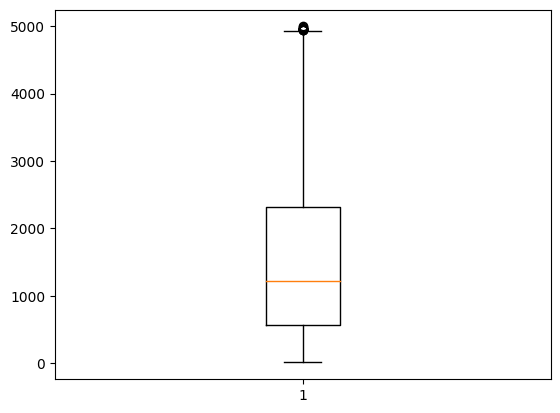

In [18]:
plt.boxplot(x=df['Total Amount'])
plt.show

In [19]:
df['Total Amount'].fillna(df['Total Amount'].median(), inplace=True)


In [20]:
df.drop('Customer Name', axis=1 ,inplace=True)

EDA

In [21]:
df.columns

Index(['Order ID', 'Product', 'Category', 'Quantity', 'Price', 'Total Amount',
       'Order Date', 'Payment Method', 'Delivery Status'],
      dtype='object')

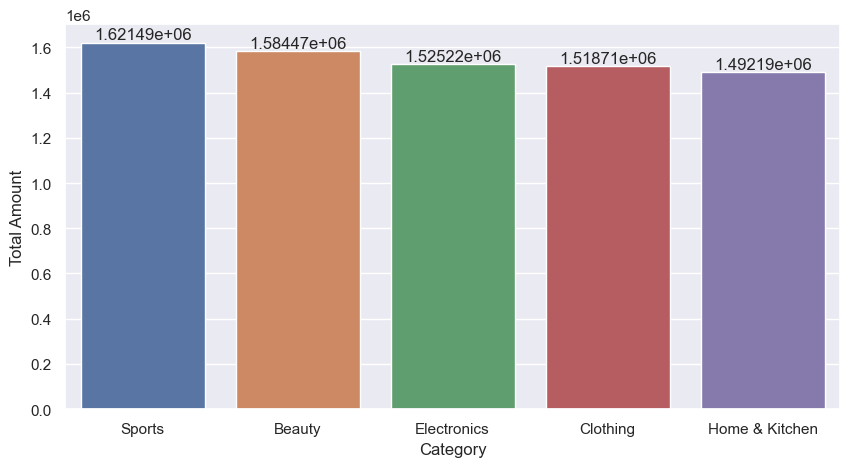

In [22]:
sales_cat=df.groupby(df['Category'],as_index=False) ['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.barplot(x='Category', y='Total Amount' , data=sales_cat)
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5035 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         5035 non-null   object 
 1   Product          5035 non-null   object 
 2   Category         5035 non-null   object 
 3   Quantity         5035 non-null   int64  
 4   Price            5035 non-null   float64
 5   Total Amount     5035 non-null   float64
 6   Order Date       5035 non-null   object 
 7   Payment Method   5035 non-null   object 
 8   Delivery Status  5035 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 393.4+ KB


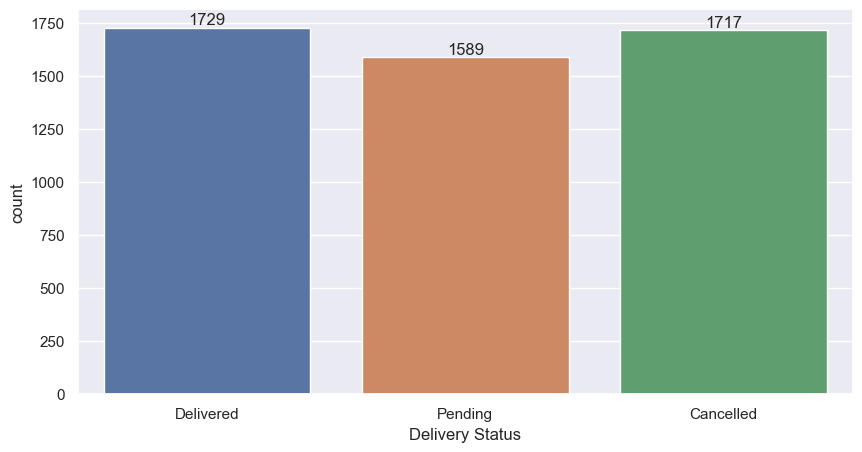

In [24]:
ax=sns.countplot(x=df['Delivery Status'],data=df)
for bars in ax.containers:
  ax.bar_label(bars)

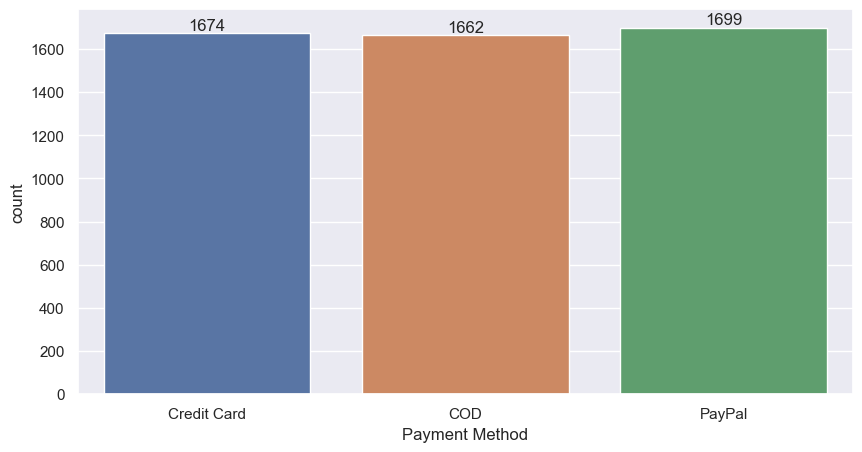

In [25]:
ax=sns.countplot(x=df['Payment Method'], data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')
df['Order Date']

0      2024-03-14
1      2024-06-21
2      2024-07-23
3      2024-04-05
4      2024-11-13
          ...    
5043   2024-04-03
5044   2024-03-27
5045   2025-01-30
5047   2024-07-18
5049   2025-01-17
Name: Order Date, Length: 5035, dtype: datetime64[ns]

In [27]:
# Top Selling Product

top_product = df['Product'].value_counts().head(10)



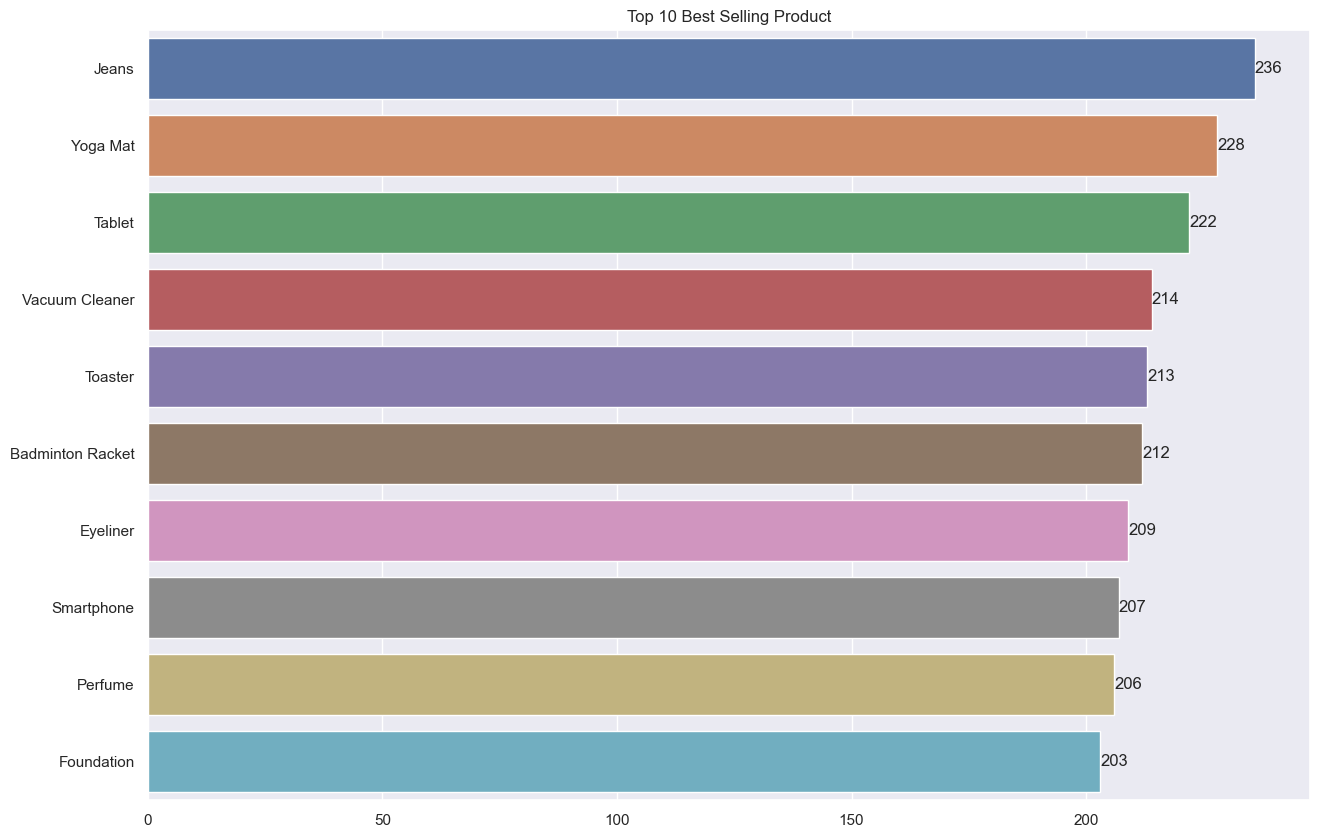

In [28]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=top_product.values, y=top_product.index)
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Top 10 Best Selling Product')
plt.ylabel('')
plt.show()

In [35]:
# Top 10 Selling Product By Amount

Top_Product_A = df.groupby(df['Product'], as_index=False) ['Total Amount'].sum().sort_values(by='Total Amount', ascending=False).head()
Top_Product_A

,Product,Total Amount
14,Shampoo,354641.61
24,Yoga Mat,354515.42
1,Badminton Racket,353985.11
9,Jeans,343872.34
19,T-Shirt,319521.33


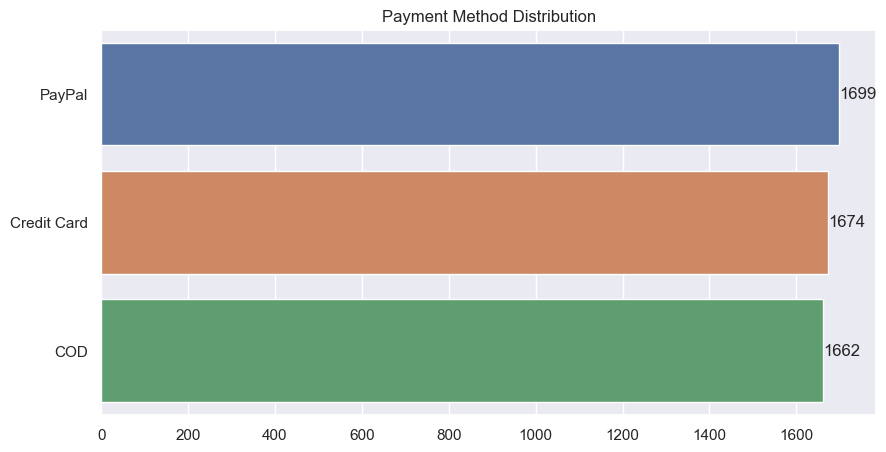

In [ ]:
# Payment Method Distribution

payment_distribution = df['Payment Method'].value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(x=payment_distribution.values, y=payment_distribution.index)
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

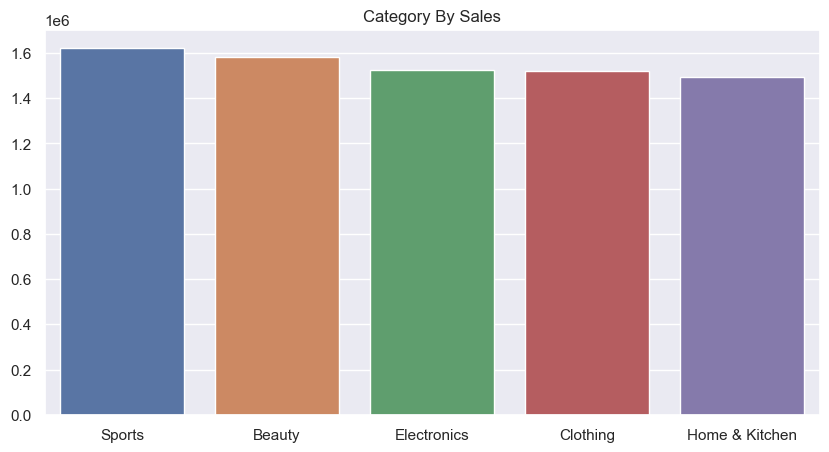

In [ ]:
category_sales = df.groupby(df['Category'],as_index=False) ['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Category', y='Total Amount', data=category_sales)
plt.title('Category By Sales')
plt.ylabel('')
plt.xlabel('')
plt.show()


In [ ]:
df.columns

Index(['Order ID', 'Product', 'Category', 'Quantity', 'Price', 'Total Amount',
       'Order Date', 'Payment Method', 'Delivery Status'],
      dtype='object')

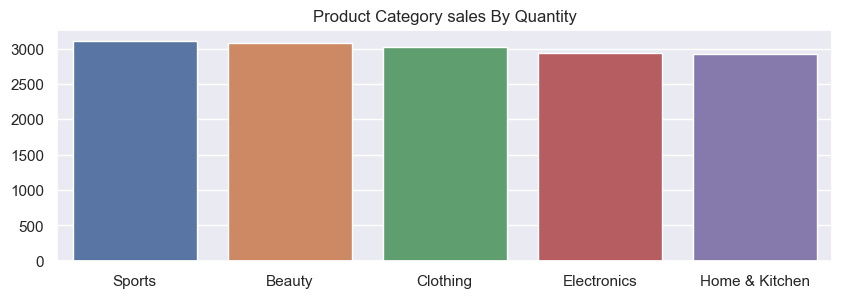

In [ ]:
p_quantity = df.groupby(df['Category'], as_index=False) ['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x='Category', y='Quantity',data=p_quantity )
plt.title('Product Category sales By Quantity')
plt.ylabel('')
plt.xlabel('')
plt.show()